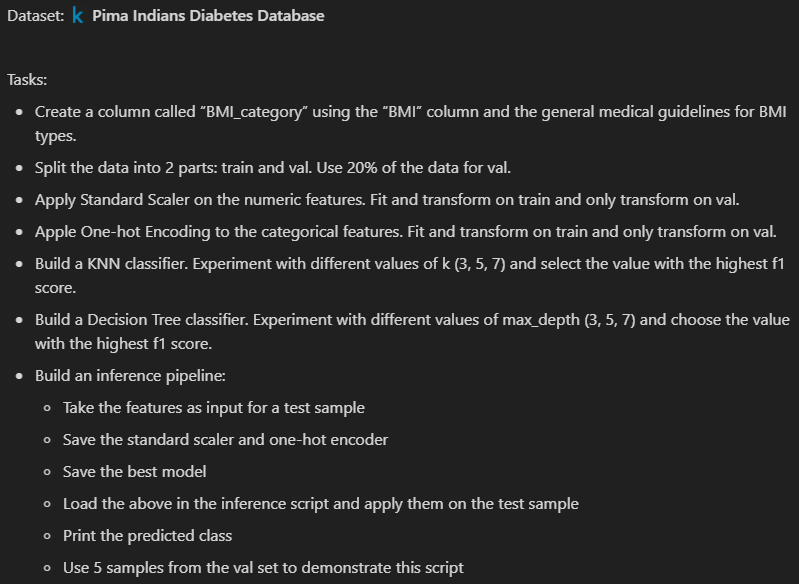

In [47]:
import pandas as pd
import numpy as np

In [48]:
import kagglehub

path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database") 
# actual path on browser  -  https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database/code

print("Path to dataset files:", path)
# local path after download  -  C:\Users\Aryan\.cache\kagglehub\datasets\uciml\pima-indians-diabetes-database\versions\1 

Path to dataset files: C:\Users\Aryan\.cache\kagglehub\datasets\uciml\pima-indians-diabetes-database\versions\1


In [49]:
df = pd.read_csv(f"{path}/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


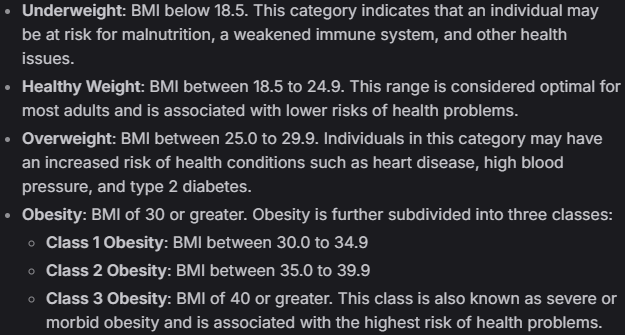

In [50]:
# GOING WITH ONLY 4 KEY CATEGORIES
# 1. bmi < 18.5 - underweight ---------------------0
# 2. 18.5 <= bmi < 25 - healthy weight-------------1
# 3. 25 <= bmi < 30 - overweight-------------------2
# 4. bmi>=30 - Obesity-----------------------------3

conditions = [
    df['BMI'] < 18.5,
    (df['BMI'] >= 18.5) & (df['BMI'] < 25),
    (df['BMI'] >= 25) & (df['BMI'] < 30),
    df['BMI'] >= 30
]
choices = [0,1,2,3]
# and (Logical AND): This operator works on single boolean values.
# & (Bitwise AND): When applied to Pandas Series or NumPy arrays of boolean values, this operator performs an element-wise AND operation.

df['BMI_category'] = np.select(conditions, choices)
# np.select(conditions, choices) is a function call from the NumPy library, 
# which is used to construct an array based on multiple conditions. 
# This function is particularly useful when you need to choose elements from different arrays depending on a set of conditions.
# The select function takes two main arguments: conditions and choices. The conditions argument is a list of boolean arrays, 
# where each array represents a condition that needs to be satisfied. The choices argument is a list of arrays from which the elements are selected. 
# Each element in the output array is taken from the corresponding array in choices where the condition in conditions is True.

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_category
0,6,148,72,35,0,33.6,0.627,50,1,3
1,1,85,66,29,0,26.6,0.351,31,0,2
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,0,2
4,0,137,40,35,168,43.1,2.288,33,1,3


In [51]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_category
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958,2.442708
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951,0.793946
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000,2.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000,3.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000,3.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,3.000000


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
 9   BMI_category              768 non-null    int32  
dtypes: float64(2), int32(1), int64(7)
memory usage: 57.1 KB


In [53]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
BMI_category                  4
dtype: int64

In [54]:
# SPLITTING TO TRAIN AND VAL DATASETS

from sklearn.model_selection import train_test_split

df_train, df_val = train_test_split(df, test_size=0.2, random_state=42)

df_val.to_csv("val.csv", index=False) #index=False to avoid saving the index column

In [55]:
# SCALING AND ONE HOT ENCODING

from sklearn.preprocessing import StandardScaler

# Outcome, BMI_category seem categorical, the rest of the values are continuous and will be scaled

# Separating the continuous and categorical columns
continuous_cols = ['Glucose', 'BloodPressure', 'Pregnancies', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
categorical_cols = ['Outcome', 'BMI_category']

# Scaling the continuous columns
scaler = StandardScaler()
df_train[continuous_cols] = scaler.fit_transform(df_train[continuous_cols])
df_val[continuous_cols] = scaler.transform(df_val[continuous_cols])

# Perform One Hot Encoding for categorical columns
df_train = pd.get_dummies(df_train, columns=categorical_cols)
df_val = pd.get_dummies(df_val, columns=categorical_cols)

In [56]:
print(df_train.shape)
print(df_val.shape)

(614, 14)
(154, 14)


In [57]:
df_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome_0', 'Outcome_1',
       'BMI_category_0', 'BMI_category_1', 'BMI_category_2', 'BMI_category_3'],
      dtype='object')

In [58]:
df_val.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome_0', 'Outcome_1',
       'BMI_category_0', 'BMI_category_1', 'BMI_category_2', 'BMI_category_3'],
      dtype='object')

--------------------------------------------------------------------------------------------------
   
### The F1 score is the harmonic mean of precision and recall. It is particularly useful when you have an imbalanced dataset, where the number of instances of one class significantly outnumbers the other class(es). The F1 score ranges from 0 to 1, with 1 being the best possible score.   
   
## Key Differences
   
### Sensitivity to Class Imbalance:
#### F1 Score: More informative than accuracy when dealing with imbalanced datasets. It considers both false positives and false negatives.
#### Accuracy: Can be misleading in imbalanced datasets because it does not differentiate between the number of correctly predicted instances of different classes.
   
### Components:
#### F1 Score: Combines precision and recall, providing a balance between the two.
#### Accuracy: Only considers the overall correctness of predictions.   
--------------------------------------------------------------------------------------------------
## In the context of the f1_score function from the sklearn.metrics module, the average parameter determines the type of averaging performed on the data. Here are the different averaging methods you can use:
   
### 'micro': Calculates metrics globally by counting the total true positives, false negatives, and false positives.   
#### 'macro': Calculates metrics for each label, and finds their unweighted mean. This does not take label imbalance into account.   
#### 'weighted': Calculates metrics for each label, and finds their average weighted by support (the number of true instances for each label). This alters 'macro' to account for label imbalance.   
#### 'samples': Calculates metrics for each instance, and finds their average (only meaningful for multilabel classification where this differs from accuracy).   

--------------------------------------------------------------------------------------------------

In [59]:
# Making KNN model

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

# Separating the features and target variable
X_train = df_train.drop(['Outcome_0', 'Outcome_1'], axis=1)
y_train = df_train[['Outcome_0', 'Outcome_1']]
X_val = df_val.drop(['Outcome_0', 'Outcome_1'], axis=1)
y_val = df_val[['Outcome_0', 'Outcome_1']]


f1_scores_n = {}
n = [3,5,7]
for i in n:
    # Initializing the KNN model
    knn = KNeighborsClassifier(n_neighbors=i)

    # Fitting the model
    knn.fit(X_train, y_train)

    # Predicting the target variable
    y_pred = knn.predict(X_val)

    # Calculating the F1 score
    f1 = f1_score(y_val, y_pred, average='micro')

    print(f"F1 Score at neighbors {i}: {f1}")

    f1_scores_n[i] = f1

# Finding the max_depth with the highest F1 score
best_n = max(f1_scores_n, key=f1_scores_n.get)
print()
print(f"Best value of n: {best_n} with F1 Score: {f1_scores_n[best_n]}")



F1 Score at neighbors 3: 0.7402597402597403
F1 Score at neighbors 5: 0.6948051948051948
F1 Score at neighbors 7: 0.7207792207792207

Best value of n: 3 with F1 Score: 0.7402597402597403


In [60]:
# Making DECISION TREE model

from sklearn.tree import DecisionTreeClassifier

# Experimenting with different values of max_depth
f1_scores_tree = {}
depths = [3, 5, 7]

for depth in depths:
    # Initializing the Decision Tree model with different max_depth
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    
    # Fitting the model
    dt.fit(X_train, y_train)
    
    # Predicting the target variable
    y_pred = dt.predict(X_val)
    
    # Calculating the F1 score
    f1 = f1_score(y_val, y_pred, average='micro')
    
    print(f"F1 Score at max_depth {depth}: {f1}")
    
    f1_scores_tree[depth] = f1

# Finding the max_depth with the highest F1 score
best_depth = max(f1_scores_tree, key=f1_scores_tree.get)
print()
print(f"Best max_depth: {best_depth} with F1 Score: {f1_scores_tree[best_depth]}")

F1 Score at max_depth 3: 0.7597402597402597
F1 Score at max_depth 5: 0.7922077922077922
F1 Score at max_depth 7: 0.7231270358306189

Best max_depth: 5 with F1 Score: 0.7922077922077922


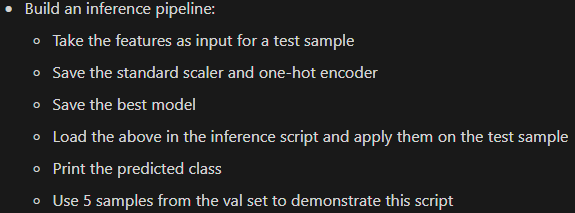

In [61]:
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Save the standard scaler
joblib.dump(scaler, 'scaler.pkl')

# Save the best model (Decision Tree in this case)
best_model = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
best_model.fit(X_train, y_train)
joblib.dump(best_model, 'best_model.pkl')

['best_model.pkl']

In [62]:
# Inference script
def inference_pipeline(sample):
    # Load the scaler and model
    scaler = joblib.load('scaler.pkl')
    model = joblib.load('best_model.pkl')
    
    # Scale the continuous features
    sample[continuous_cols] = scaler.transform(sample[continuous_cols])
    
    # Perform one-hot encoding for categorical columns
    sample = pd.get_dummies(sample, columns=categorical_cols)
    
    # Ensure the sample has the same columns as the training data
    for col in X_train.columns:
        if col not in sample.columns:
            sample[col] = 0
    
    # Reorder columns to match the training data
    sample = sample[X_train.columns]
    
    # Predict the class
    prediction = model.predict(sample)
    
    return prediction

In [63]:
val = pd.read_csv("val.csv")

In [64]:
# Demonstrate the script with 5 samples from the validation set
samples = val.sample(5)
predictions = inference_pipeline(samples)

print("Predictions for the samples:")
print("Outcome_0, Outcome_1")
print(predictions)

Predictions for the samples:
Outcome_0, Outcome_1
[[ True False]
 [ True False]
 [ True False]
 [False  True]
 [ True False]]


In [65]:
# Demonstrate the script with full validation set
samples = val
predictions = inference_pipeline(samples)

print("Predictions for the samples:")
print("Outcome_0, Outcome_1")
print(predictions)

Predictions for the samples:
Outcome_0, Outcome_1
[[ True False]
 [ True False]
 [ True False]
 [ True False]
 [ True False]
 [ True False]
 [ True False]
 [False  True]
 [False  True]
 [False  True]
 [ True False]
 [False  True]
 [False  True]
 [False  True]
 [ True False]
 [ True False]
 [ True False]
 [ True False]
 [ True False]
 [ True False]
 [ True False]
 [ True False]
 [ True False]
 [ True False]
 [False  True]
 [False  True]
 [ True False]
 [ True False]
 [ True False]
 [ True False]
 [ True False]
 [False  True]
 [False  True]
 [False  True]
 [False  True]
 [False  True]
 [False  True]
 [False  True]
 [ True False]
 [False  True]
 [ True False]
 [False  True]
 [False  True]
 [ True False]
 [ True False]
 [ True False]
 [False  True]
 [ True False]
 [ True False]
 [False  True]
 [ True False]
 [False  True]
 [False  True]
 [ True False]
 [ True False]
 [ True False]
 [ True False]
 [ True False]
 [ True False]
 [False  True]
 [False  True]
 [ True False]
 [ True False]
 [ Tr

In [66]:
df_pred = pd.DataFrame(predictions, columns=['Outcome_0', 'Outcome_1'])
print(f1_score(y_val, predictions, average='micro'))

0.7922077922077922
